Graph lock in r values

In [2]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def graph_cartesian_values(folderpath):
    dataframe = pd.read_csv(folderpath + "/lock_in_values_x.csv", index_col = 0, header = 0)
    dataframe_y = pd.read_csv(folderpath + "/lock_in_values_y.csv", index_col = 0, header = 0)
    dataframe = dataframe.T
    dataframe_y = dataframe_y.T
    display(dataframe)
    for column in dataframe.columns:
        df = dataframe[column]
        col = df.to_numpy()
        index = np.argmax(col)
        dataframe[column].plot(use_index = False)
        plt.title("x value at " + str(column))
        plt.xlabel("Wavelengths (nm)")
        plt.ylabel("Signal Intensity (arb. units)")
        plt.show()
        plt.close()
    for column in dataframe_y.columns:
        df_y = dataframe_y[column]
        col = df_y.to_numpy()
        index = np.argmax(col)
        dataframe_y[column].plot()
        plt.title("y value at " + str(column))
        plt.xlabel("Wavelengths (nm)")
        plt.ylabel("Signal Intensity (arb. units)")
        plt.show()
        plt.close()
    return dataframe

def graph_r_values(folderpath):
    dataframe = pd.read_csv(folderpath + "/lock_in_values_r.csv", index_col = 0, header = 0)
    dataframe_theta = pd.read_csv(folderpath + "/lock_in_values_theta.csv", index_col = 0, header = 0)
    dataframe = dataframe.T
    dataframe_theta = dataframe_theta.T
    display(dataframe)
    averaged = 0
    i = 0
    for column in dataframe.columns:
        df = dataframe[column]
        col = df.to_numpy()
        index = np.argmax(col)
        dataframe[column].plot(use_index = False)
        averaged += df
        i += 1
        #plt.plot(dataframe.index, dataframe[column].values)
        ax = plt.axes()
        plt.title("r value at " + str(column))
        plt.xlabel("Wavelengths (nm)")
        plt.ylabel("Signal Intensity (arb. units)")
        plt.xlim(0, 100)
        plt.show()
        plt.close()
    averaged /= i
    averaged.plot(use_index = False)
    ax = plt.axes()
    plt.xlim(400, 800)
    plt.title("Lock in Magnitude vs Wavelength")
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Signal Intensity (arb. units)")
    plt.show()
    plt.close()
    
    for column in dataframe_theta.columns:
        df_theta = dataframe_theta[column]
        col = df_theta.to_numpy()
        index = np.argmax(col)
        dataframe_theta[column].plot()
        plt.title("Theta value at " + str(column))
        plt.xlabel("Wavelengths (nm)")
        plt.ylabel("Signal Phase (radians)")
        plt.show()
        plt.close()
    plt.show()
    return dataframe

    
def graph_ref_data(filepath):
    df_ref = pd.read_csv(filepath, index_col=None, header=None).T
    plt.title("ref signal")
    plt.plot(df_ref)
    plt.show()
    
    fft_ref_freq = np.fft.fftfreq(len(df_ref), d = 0.0001)
    fft_ref = np.fft.fft(df_ref.values)
    plt.plot(fft_ref)
    plt.title("fft ref signal")
    plt.show()
    
def graph_intensities(filepath):
    filename_intensities = filepath + "intensities.csv"
    intensities = np.genfromtxt(filename_intensities, delimiter = ',')
    wavelengths = np.genfromtxt(filepath + "wavelengths.csv", delimiter = ',')
    plt.title("Intensity vs Wavelength")
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Intensities (arb. units)")
    plt.plot(wavelengths, np.delete(intensities[0], 0))
    plt.show()
    plt.close()
    
def graph_fft(filename_intensities, locations = [600]):
    signal = pd.read_csv(filename_intensities, index_col = 0, header = None)
    for location in locations:
        intensities = signal[location]
        display(intensities[location])
        plt.title("real-time signal")
        plt.plot(intensities[location])
        print("mean intensity = {}".format(intensities[location].mean()))
        

        np.fft.rfftfreq(len(intensities[location]), d = 0.0001)
        plt.title("fft of real-time signal")
        fft_intensities = np.fft.rfft(intensities[location])
        plt.plot(fft_intensities)
        plt.show()

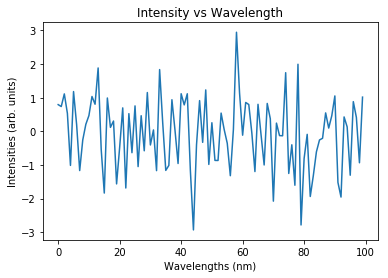

In [4]:
graph_intensities('../lock_in_sim_data/results/')

,8.191
0,0.033772
1,0.028342
2,0.027272
3,0.047767
4,0.010968
5,0.038115
6,0.005808
7,0.014356
8,0.022079
9,0.029755


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


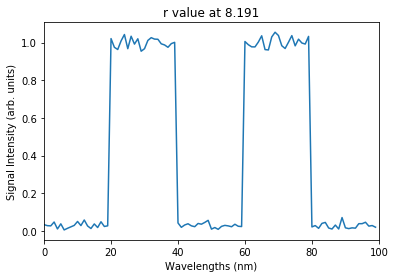

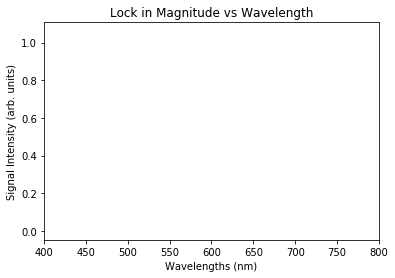

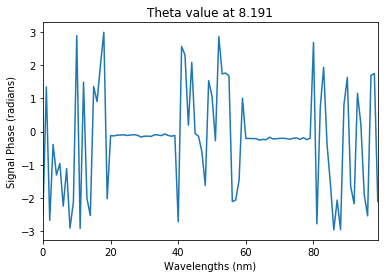

,8.191
0,0.033772
1,0.028342
2,0.027272
3,0.047767
4,0.010968
5,0.038115
6,0.005808
7,0.014356
8,0.022079
9,0.029755


In [5]:
graph_r_values('../lock_in_sim_data/results/')